# Loading Required Libraries

In [1]:
import pandas as pd
import missingno as msno

%matplotlib inline

# Loading Data Set

In [2]:
df = pd.read_csv('data/input.tsv', sep='\t', index_col='ID')

df.iloc[:10, :10]

,cmmc,ecog_ps,cell_markers,dna_index,lgh,lgl,percent_aneuploid,percent_plama_cells_bone_marrow,percent_plama_cells_peripherical_blood,creatinine
ID,,,,,,,,,,
MMRF1011,NaN,PS 1 (Restricted in physically strenuous activ...,CD138,NaN,NaN,NaN,0.0,0.9,0.0,123.760
MMRF1013,NaN,PS 1 (Restricted in physically strenuous activ...,CD117,NaN,NaN,NaN,0.0,1.3,0.2,186.524
MMRF1016,NaN,PS 1 (Restricted in physically strenuous activ...,CD117,NaN,IgG,Lambda,0.0,2.0,0.0,86.632
MMRF1017,NaN,PS 1 (Restricted in physically strenuous activ...,CD138,1.25,IgG,Lambda,6.9,2.1,0.0,79.560
MMRF1018,NaN,PS 1 (Restricted in physically strenuous activ...,CD117,NaN,IgA,Kappa,0.0,2.1,0.0,133.484
MMRF1029,NaN,PS 1 (Restricted in physically strenuous activ...,CD117,NaN,NaN,Kappa,0.0,8.4,0.0,106.080
MMRF1030,NaN,PS 1 (Restricted in physically strenuous activ...,CD117,1.16,IgG,Kappa,15.4,9.6,0.0,55.692
MMRF1031,NaN,PS 0 (Fully Active),CD117,1.28,IgA,NaN,18.3,10.1,0.0,81.328
MMRF1032,NaN,PS 2 (Ambulatory and capable of all selfcare),CD117,1.15,IgG,Lambda,20.7,11.1,0.0,70.720


# Visualize Variables with or without Missing Values

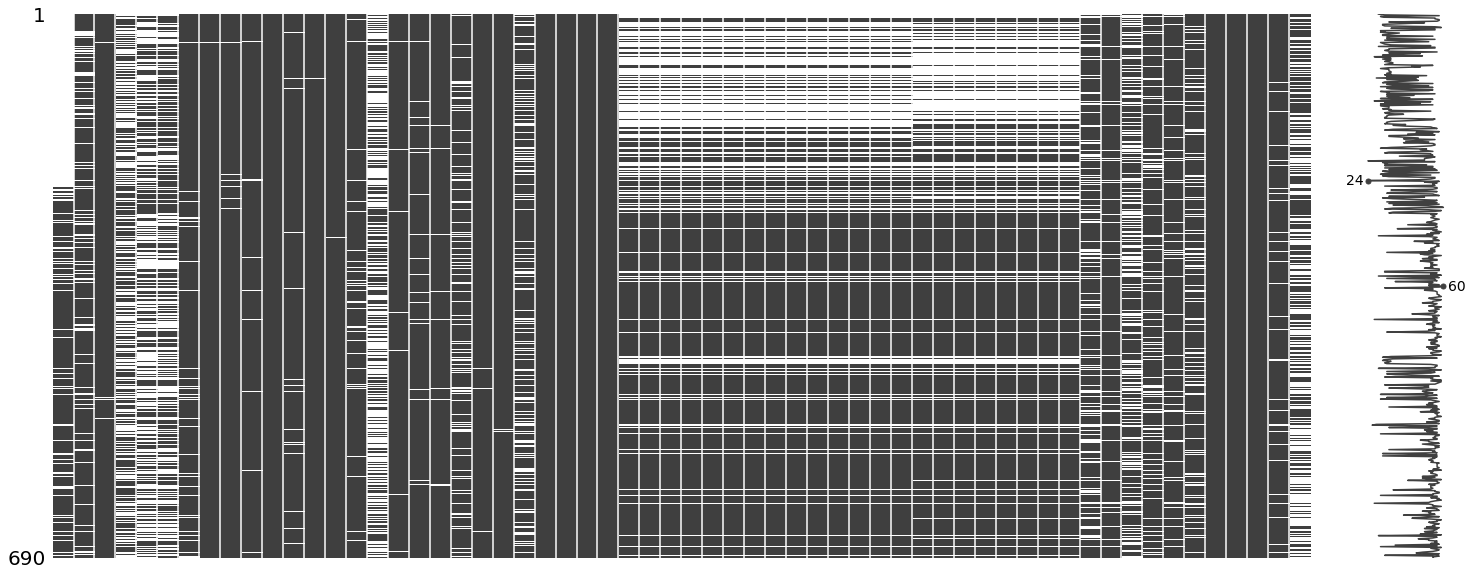

In [3]:
msno.matrix(df);

# Visualizing Variables with Less than of 10% of Missing Values

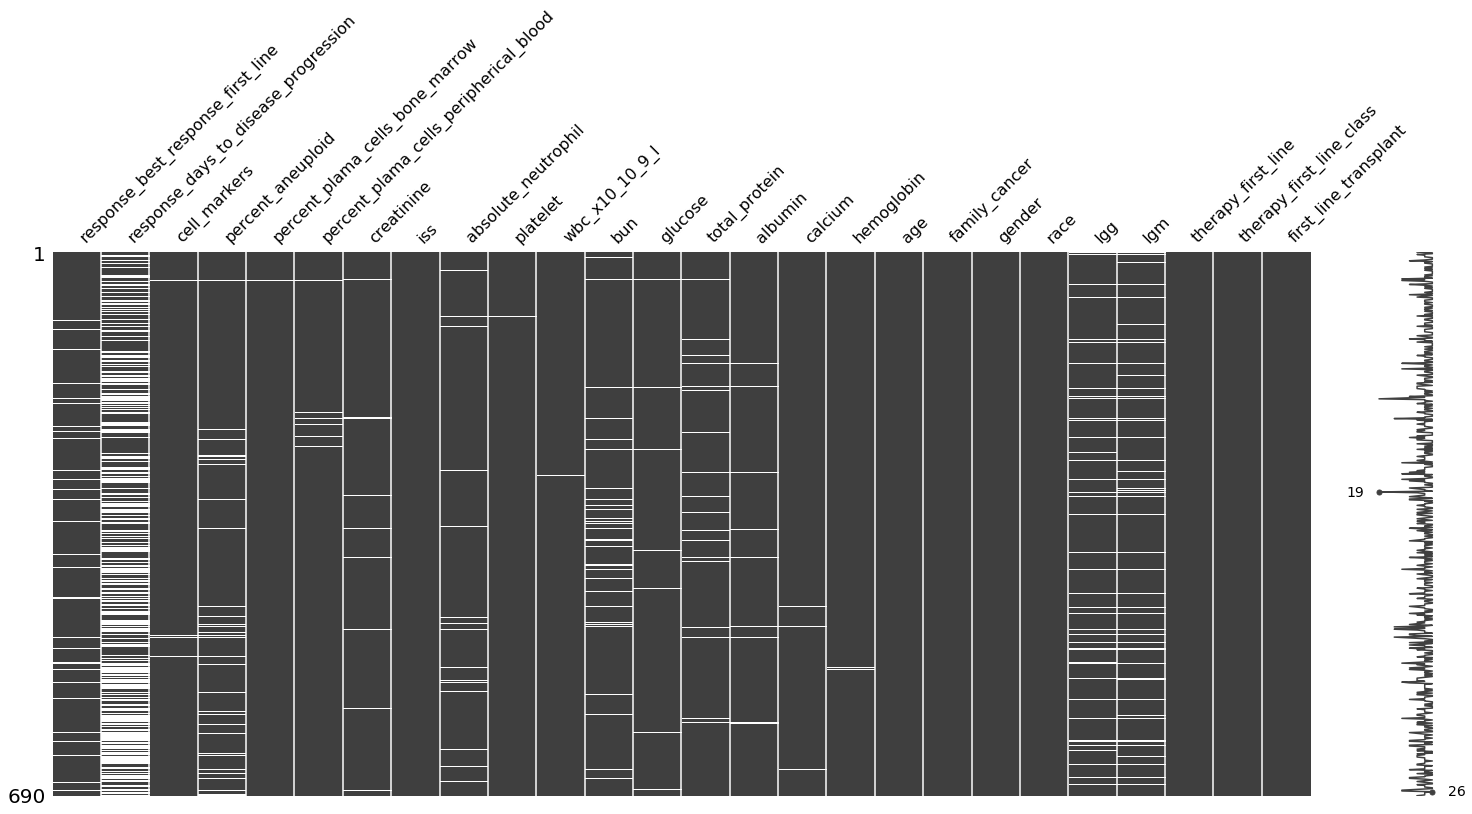

In [4]:
selected_columns = []

for c in df:
    
    series = df[c]
    
    if series.isnull().sum() / len(series) < .1 or c == 'response_days_to_disease_progression':
        selected_columns.append(c)
        
selected_columns = selected_columns[-2:] + selected_columns[:-2]

msno.matrix(df[selected_columns]);

# Exporting data set composed by variables with less than 10% of missing values

In [5]:
df[selected_columns].loc[~(df[selected_columns[0]].isnull() & df[selected_columns[1]].isnull())].to_csv('data/clinical.tsv', sep='\t', index=True)